
# Linear Regression

Linear regression at its core allows us to model a set of features, $x_j$ that correlate to values $y_j$. The relationship between the features is defined linearly. This relationship is explicitly:
$$x_j \rightarrow y_j$$
$$y_j \approx x^{(0)}_j\theta^{(0)}_j+x^{(1)}_j\theta^{(1)}_j...x^{(n)}_j\theta^{(n)}_j$$

$\theta_j$ is the hyperparameter set which maps $x_j$ to approximately $y_j$. 
 
A cost function can be defined which compares the difference between the expected value of the $j^{th}$ element $x_j$, which if modeled perfectly would be exactly $y_j$. 

In the standard way, we define the cost function: 
$$J(\theta) = {1\over2}\sum_i\left(\theta^Tx^{(i)}-y^{(i)}\right)^2$$

And its derivative, which is used for the standard convex optimization:
$${{\partial J(\theta)}\over{\partial \theta_j}} = \sum_i x^{(i)}_j\left(\theta^T x^{(i)}_j-y_j\right)$$

For this excersize, the feature indexing is assumed to start from 1.

# Exersize 1A: Linear Regression
Instead of using matlab, we use python to perform the linear regression. Data source used will be housing.data, which contains some categorical data, numerical data, and the overall home value. An offset parameter is added to the front of the feature set. The last entry in the feature set is the price of the home.



In [60]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from operator import itemgetter

def load_data(filename):
    '''
    loads whitespace separated file into a list of lists, data.
    data[row] = list of data points
    data[row][col] = specific feature
    
    No assumptions are made about the type of data, but it appears
    that housing.data (for example) has a mixture of categorical and
    numeric features.
    '''
    data = []
    with open(filename,'r') as in_file:
        lines = in_file.readlines();
        for line in lines:
            # convert to the appropriate type
            out_list = []
            numeric_data = line.split()
            out_list.append(1)
            for i in range(14):
                if i == 3 or i == 8:
                    out_list.append(int(numeric_data[i]))
                else:
                    out_list.append(float(numeric_data[i]))
            data.append(out_list)
    print "loaded",len(data),"lines of data"
    return data

data = load_data("./housing.data")
random.shuffle(data)
testing_data = data[:250]
training_data = data[250:]

testing_data = sorted(testing_data,key=itemgetter(14))
training_data = sorted(training_data,key=itemgetter(14))

loaded 506 lines of data


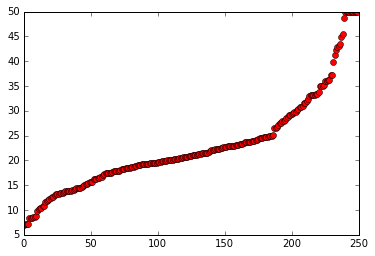

In [63]:
order = range(len(testing_data))
vals = [x[14] for x in testing_data]
plt.plot(order,vals,'ro')